In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('./smhi_percipitation_data.csv', sep=';', header=11, usecols=[0, 1, 2, 3, 4])

In [4]:
df

,Från Datum Tid (UTC),Till Datum Tid (UTC),Representativt dygn,Nederbördsmängd,Kvalitet
0,1961-01-01 06:00:01,1961-01-02 06:00:00,1961-01-01,0.3,Y
1,1961-01-02 06:00:01,1961-01-03 06:00:00,1961-01-02,0.5,Y
2,1961-01-03 06:00:01,1961-01-04 06:00:00,1961-01-03,8.4,Y
3,1961-01-04 06:00:01,1961-01-05 06:00:00,1961-01-04,0.0,Y
4,1961-01-05 06:00:01,1961-01-06 06:00:00,1961-01-05,2.0,Y
...,...,...,...,...,...
15487,2023-06-26 06:00:01,2023-06-27 06:00:00,2023-06-26,18.5,G
15488,2023-06-27 06:00:01,2023-06-28 06:00:00,2023-06-27,10.6,G
15489,2023-06-28 06:00:01,2023-06-29 06:00:00,2023-06-28,0.0,G
15490,2023-06-29 06:00:01,2023-06-30 06:00:00,2023-06-29,5.0,G


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Från Datum Tid (UTC)  15492 non-null  object 
 1   Till Datum Tid (UTC)  15492 non-null  object 
 2   Representativt dygn   15492 non-null  object 
 3   Nederbördsmängd       15492 non-null  float64
 4   Kvalitet              15492 non-null  object 
dtypes: float64(1), object(4)
memory usage: 605.3+ KB


In [6]:
df.describe()

,Nederbördsmängd
count,15492.000000
mean,2.341112
std,4.856172
min,0.000000
25%,0.000000
50%,0.000000
75%,2.400000
max,85.700000


In [7]:
df['Kvalitet'].value_counts()

Kvalitet
G    9926
Y    5566
Name: count, dtype: int64

In [8]:
df = df.drop(['Från Datum Tid (UTC)', 'Till Datum Tid (UTC)'], axis=1)

In [9]:
df

,Representativt dygn,Nederbördsmängd,Kvalitet
0,1961-01-01,0.3,Y
1,1961-01-02,0.5,Y
2,1961-01-03,8.4,Y
3,1961-01-04,0.0,Y
4,1961-01-05,2.0,Y
...,...,...,...
15487,2023-06-26,18.5,G
15488,2023-06-27,10.6,G
15489,2023-06-28,0.0,G
15490,2023-06-29,5.0,G


In [10]:
df['Year'] = df['Representativt dygn'].str.strip('-').str[0:4]

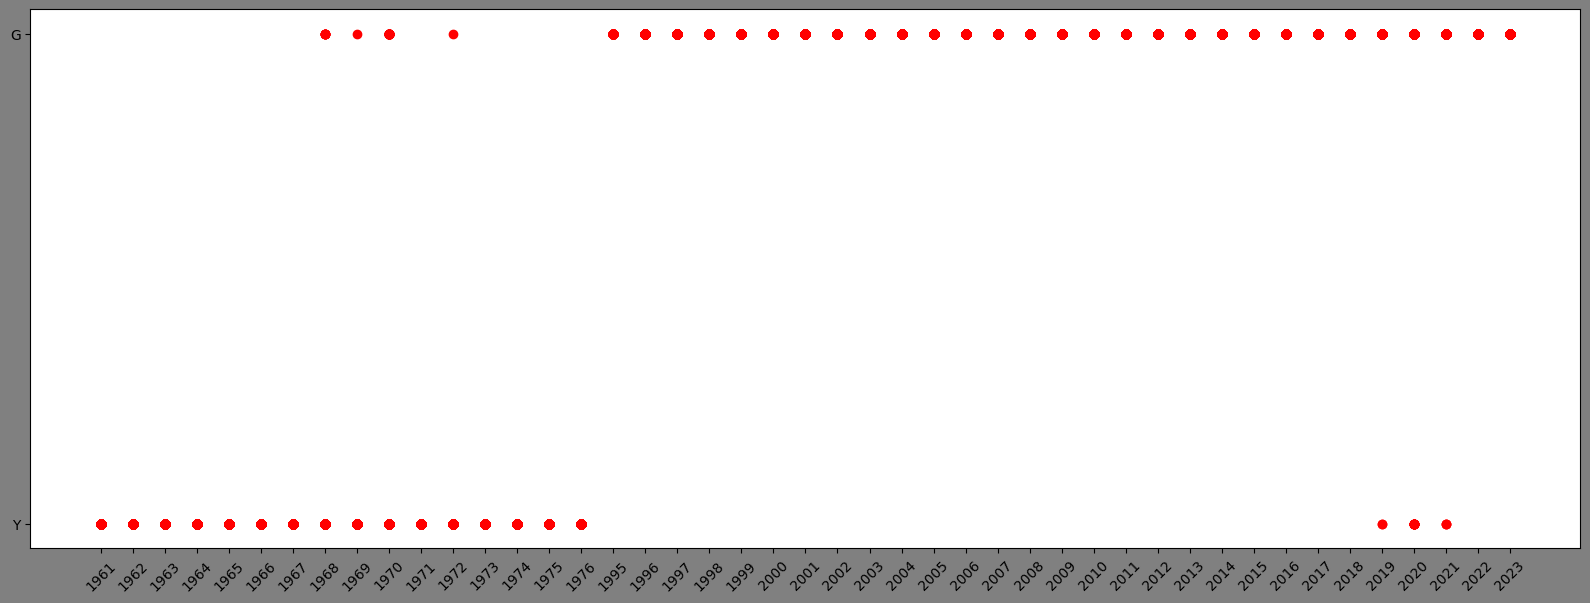

In [11]:
plt.figure(figsize=(20, 7), facecolor='grey')
plt.scatter(df['Year'], df['Kvalitet'], c='r')
plt.xticks(rotation=45)
plt.show()

In [12]:
df.to_csv('daily_percipitation_curated_df.csv', index=False, mode='w')

In [100]:
first_day = df['Representativt dygn'][0]
last_day_number = len(df)
last_day = df['Representativt dygn'][last_day_number-1]


2023-06-30


In [112]:
first_day_date = dt.datetime(int(first_day[:4]), int(first_day[5:7]), int(first_day[8:10]))
last_day_date = dt.datetime(int(last_day[:4]), int(last_day[5:7]), int(last_day[8:10]))